### Minghao Zhong & Peter Vincent CS 814 Coursework Submission

# Import Required Libraries 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


# Create A Map To Display Our Spaces 

Please enter the first dimension of the map :10
Please enter the second dimension of the map :10


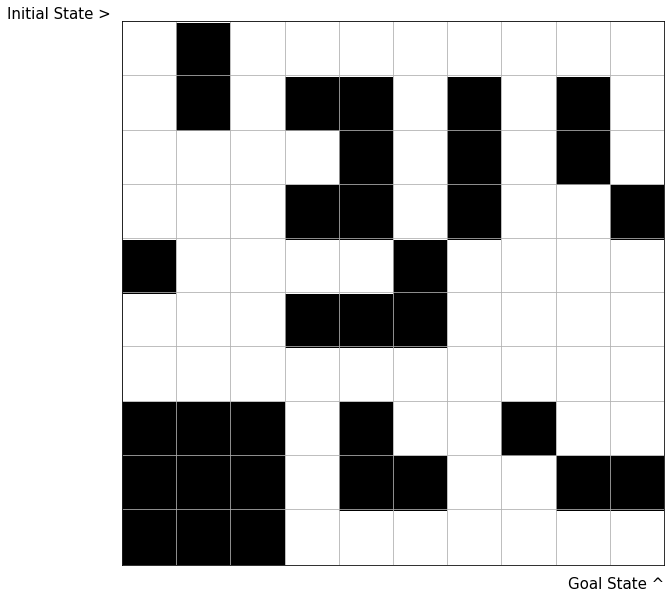

In [7]:
a = int(input("Please enter the first dimension of the map :"))
b = int(input("Please enter the second dimension of the map :"))

nums = np.random.choice([0,1], size=(a,b),p=[.3, .7])
nums[a-1,b-1] = 1

#We can use this function to make our map

def Make_map(x,y):
    # Designate colours
    color1=(1,1,1)
    color2=(0/255,0/255,0/255)

# Visually plot the state space
    my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list('my_cmap',['black','white'],2)
    plt.figure(figsize=(10, 10))
    cs=plt.imshow(nums,cmap=my_cmap,aspect='equal')
   
    plt.xticks(np.linspace(0,b,b,endpoint=False)-0.5,(),fontsize=0)
    plt.yticks(np.linspace(0,a,a,endpoint=False)-0.53,(),fontsize=0)
    plt.ylabel("Initial State >",
                   size=15,
                   rotation=0,
                   loc='top')
    plt.xlabel("Goal State ^",
                   size=15,
                   rotation=0,
                   loc='right')
    plt.tick_params(bottom=False,left=False,labeltop=True,labelright=True)
    plt.grid(which='both')
    plt.show()

Make_map(a,b)


## What Is Our Goal State and Our Initial State?

In [8]:
# As we are using a matrix this the goal state and initial state
# below is to help the reader understand. 

def goal_state(a,b):
    return[a,b]

print('In our map the initial state is [0,0]')

print("and the goal state is", goal_state(a,b))


In our map the initial state is [0,0]
and the goal state is [10, 10]


# Build A* Algorithm to Answer the Problem

## Check If The State Is Valid 

In [10]:
# Check if the state is valid
def checkValidState(state): 
    if state[0] > a-1 or state[0] < 0:
            return False
    if state[1] > b-1 or state[1] < 0:
            return False
    if nums[state[0]][state[1]] == 0:
        return False
    return True

## Check If Our Agent is in a Goal State

In [11]:
# Check if the current node is the goal    
def goal(state):
    if state[0] == a-1 and state[1] == b-1:
        return True
    else:
        return False

## Our Heuristic

In [12]:
# We have chosen to use the manhattan distance to the goal state as our heuristic to guide A* 

def heuristic(state):
        value = ( a - 1 - state[0]) + ( b - 1 - state[1])
        return value 

## Then We Can Run Our Algorithm!

In [13]:
try:
    current = [0,0]
    visitedstate=[[0,0]]
    agenda = []
    valuelist = []
    global minvalue
    possibleActions = [[1,0],[-1,0],[0,1],[0,-1]]
    costlist = []
    cost = 0
    reach_cost = 1
    reach_cost_list = [0]
    while not goal(current):
        cost += 1
        for move in possibleActions:
            nextstate = [current[i] + move[i] for i in range(2)]
            if nextstate not in visitedstate and nextstate not in agenda and checkValidState(nextstate):
                agenda.append(nextstate)
                if cost != reach_cost: 
                    real_cost = reach_cost + 1
                else:
                    real_cost = cost
                costlist.append(real_cost)
                valuelist.append(heuristic(nextstate))
        if len(agenda) == 1:
            current = agenda.pop(0)
            k = valuelist.pop(0)
            reach_cost = costlist.pop(0)
            visitedstate.append(current)
        else:        
            minvalue = valuelist[0] + costlist[0]
            for i in range(len(agenda)):
                if valuelist[i] + costlist[i] <= minvalue:                
                    minvalue = valuelist[i] + costlist[i]
                    minindex = i
            current = agenda.pop(minindex)
            reach_cost = costlist.pop(minindex)
            k = valuelist.pop(minindex) 
            visitedstate.append(current)
        reach_cost_list.append(reach_cost)
except IndexError:  
    print('No way out! Try another maze.')


## What Does This Look Like?

In [14]:
active = [a-1,b-1]
real_route = [[a-1,b-1]]
while active != [0,0]:
    for move in possibleActions:
        nextstep = [active[i] + move[i] for i in range(2)]
        if nextstep in visitedstate and reach_cost_list[visitedstate.index(active)] - 1 == reach_cost_list[visitedstate.index(nextstep)]:
            active = nextstep
            real_route.append(nextstep)

In [15]:
new_nums = nums.tolist()
k = len(real_route)
i =1

for item in real_route:
    new_nums[item[0]][item[1]] = (i/(1.25*k))
    i +=1

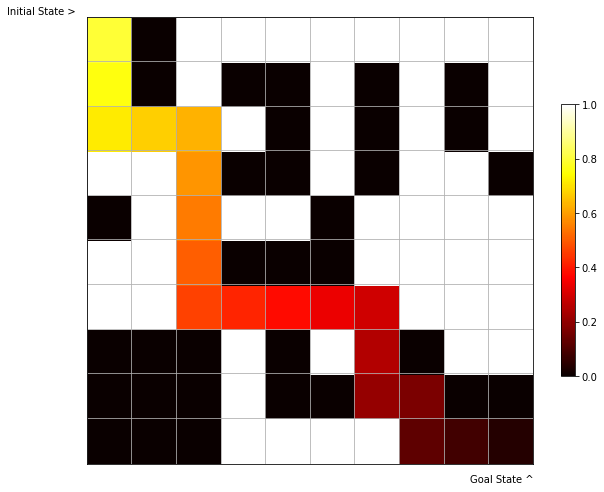

In [16]:
color1=(1,1,1)
color2=(0/255,0/255,0/255)
color3=(150/255,150/255,150/255)

# Visually plot the state space

plt.figure(figsize=(10, 10))

cs=plt.imshow(new_nums,cmap='hot',aspect='equal')
plt.xticks(np.linspace(0,b,b,endpoint=False)-0.51,(),fontsize=0)
plt.yticks(np.linspace(0,a,a,endpoint=False)-0.53,(),fontsize=0)
plt.ylabel("Initial State >",
            size=a,
            rotation=0,
            loc='top')
plt.xlabel("Goal State ^",
            size=a,
            rotation=0,
            loc='right')
plt.tick_params(bottom=False,left=False,labeltop=True,labelright=True)
plt.grid(which='both')
plt.colorbar(shrink =0.5)
plt.show()

